# Projection des données sur un espace 2D
Ce notebook a comme objectif explorer le potentielle de le changement par répresentation.

In [1]:
from cookie_clusters import *

In [2]:
import pickle
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import HDBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [3]:
file = open('../data/processed/pixels_de_interet_dic.pkl', 'rb')
dic_de_pixels = pickle.load(file)
file.close()

file = open('../data/processed/pixels_de_interet_list.pkl', 'rb')
pixels_de_interet = pickle.load(file)
file.close()

matrice_nir = pd.read_csv('../data/processed/vec_nir.csv').to_numpy()
matrice_rouge = pd.read_csv('../data/processed/vec_red.csv').to_numpy()
matrice_vert = pd.read_csv('../data/processed/vec_green.csv').to_numpy()
matrice_bleu = pd.read_csv('../data/processed/vec_blue.csv').to_numpy()
matrice_ndvi = pd.read_csv('../data/processed/vec_ndvi.csv').to_numpy()
matrice_ndwi = pd.read_csv('../data/processed/vec_ndwi.csv').to_numpy()

# Bande Rouge

Axes(0.125,0.11;0.775x0.77)


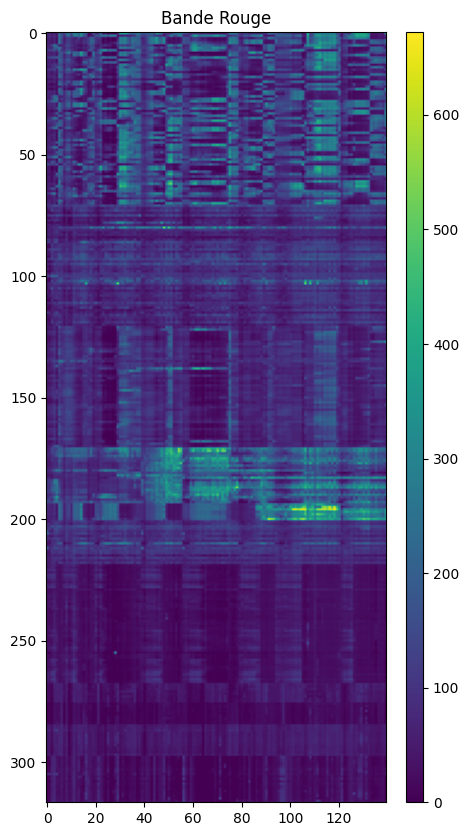

In [4]:
matrice = np.delete(matrice_rouge,22,1)
# Displaying pixels
img = (matrice/8).astype(int)
plt.figure(figsize=(10,10))
plt.title('Bande Rouge')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [5]:
import umap
reducer = umap.UMAP(random_state=42)

In [6]:
display(matrice.shape)
embedding = reducer.fit_transform(matrice)
display(embedding.shape)

(317, 140)

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(317, 2)

In [7]:
support_matrice = pd.DataFrame(matrice)
support_matrice.head()

classes = list()

for i in pixels_de_interet:
    for j, k in zip(list(dic_de_pixels.keys()), range(0, len(list(dic_de_pixels.keys())))):
        if i in list(dic_de_pixels[j]):
            classes.append(k)


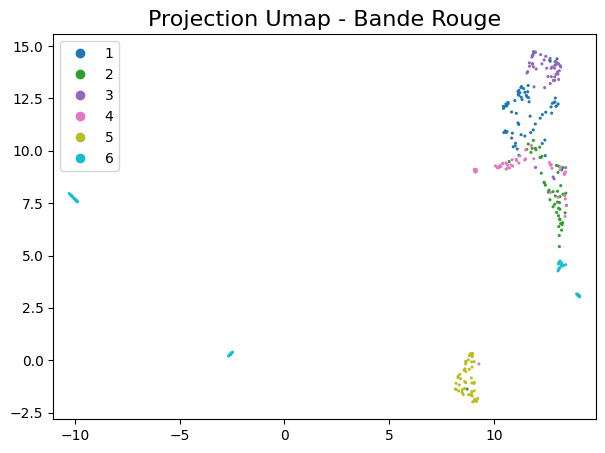

In [8]:
fig = plt.figure(figsize=(7, 5))
scat = plt.scatter(embedding[:, 0],
                   embedding[:, 1],
                   c=[x for x in classes],
                   cmap = 'tab10',
                   s=1.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(handles=scat.legend_elements()[0], labels=[key for key in dic_de_pixels.keys()])
plt.title('Projection Umap - Bande Rouge', fontsize=16)
plt.show()

## Paranthesis : Triying a HDBSCAN over this new representation.

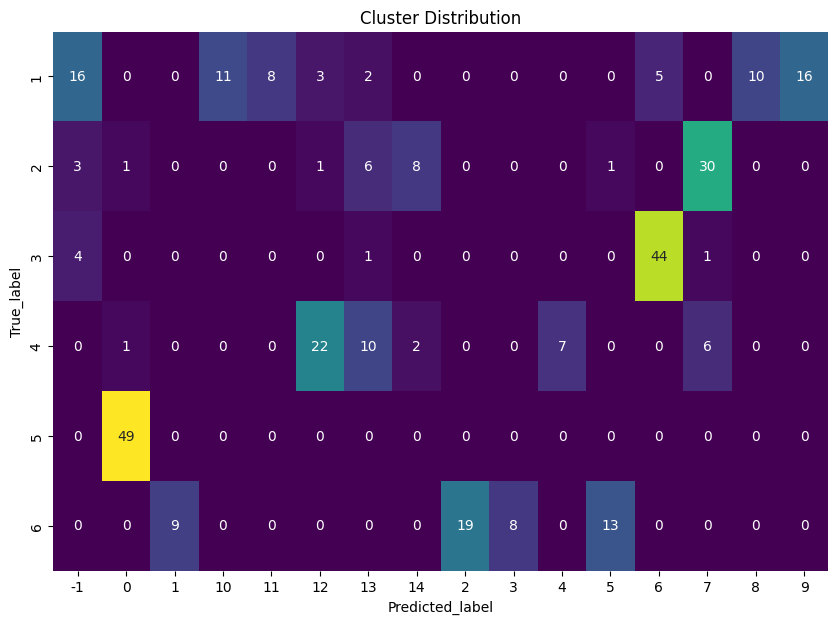

In [9]:
hdb = HDBSCAN()
hdb.fit(embedding)
yhat_rouge = hdb.labels_
# Evaluating the results: 
eval = evaluator_de_experiences(yhat_rouge, pixels_de_interet, dic_de_pixels, embedding)
eval.cluster_distribution()

# Bande Verte

Axes(0.125,0.11;0.775x0.77)


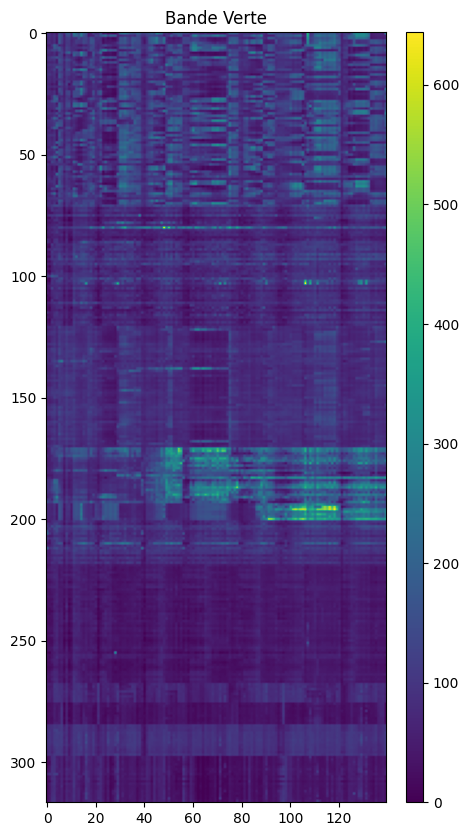

In [10]:
matrice = np.delete(matrice_vert,22,1)
# Displaying pixels
img = (matrice/8).astype(int)
plt.figure(figsize=(10,10))
plt.title('Bande Verte')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [11]:
reducer = umap.UMAP(random_state=42)
display(matrice.shape)
embedding = reducer.fit_transform(matrice)
display(embedding.shape)

(317, 140)

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(317, 2)

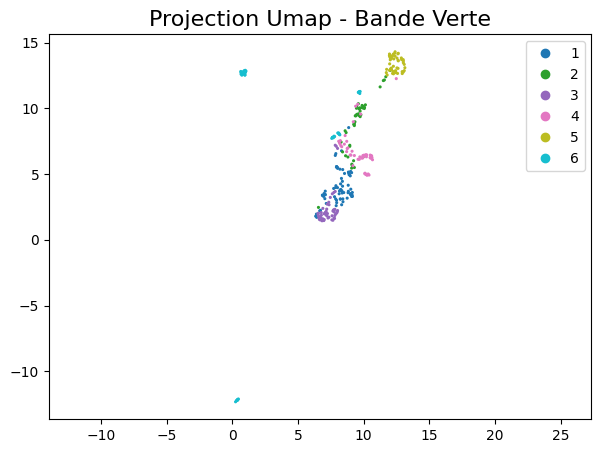

In [12]:
fig = plt.figure(figsize=(7, 5))
scat = plt.scatter(embedding[:, 0],
                   embedding[:, 1],
                   c=[x for x in classes],
                   cmap = 'tab10',
                   s=1.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(handles=scat.legend_elements()[0], labels=[key for key in dic_de_pixels.keys()])
plt.title('Projection Umap - Bande Verte', fontsize=16)
plt.show()


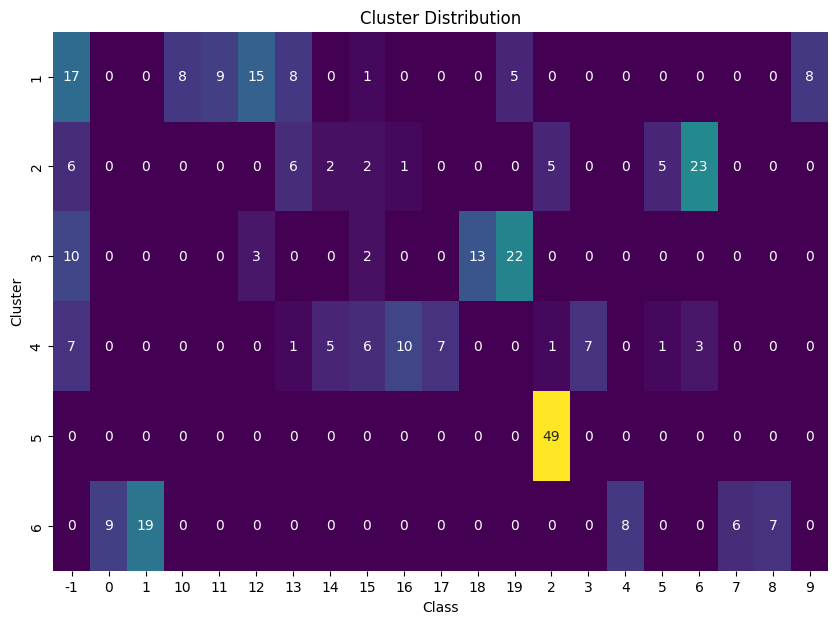

In [13]:
hdb = HDBSCAN()
hdb.fit(embedding)
yhat_vert = hdb.labels_
# Evaluating the results: 
eval = evaluator_de_experiences(yhat_vert, pixels_de_interet, dic_de_pixels, embedding)
eval.cluster_distribution()

# Bande Bleue

Axes(0.125,0.11;0.775x0.77)


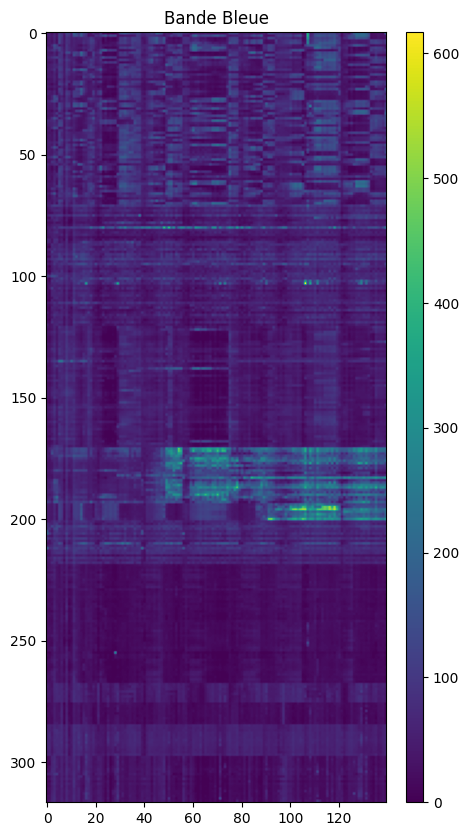

In [14]:
matrice = np.delete(matrice_bleu,22,1)
# Displaying pixels
img = (matrice/8).astype(int)
plt.figure(figsize=(10,10))
plt.title('Bande Bleue')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [15]:
reducer = umap.UMAP(random_state=42)
display(matrice.shape)
embedding = reducer.fit_transform(matrice)
display(embedding.shape)

(317, 140)

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(317, 2)

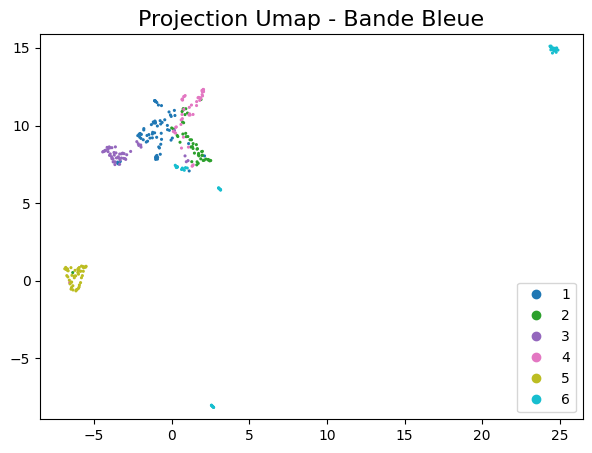

In [16]:
fig = plt.figure(figsize=(7, 5))
scat = plt.scatter(embedding[:, 0],
                   embedding[:, 1],
                   c=[x for x in classes],
                   cmap = 'tab10',
                   s=1.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(handles=scat.legend_elements()[0], labels=[key for key in dic_de_pixels.keys()])
plt.title('Projection Umap - Bande Bleue', fontsize=16)
plt.show()

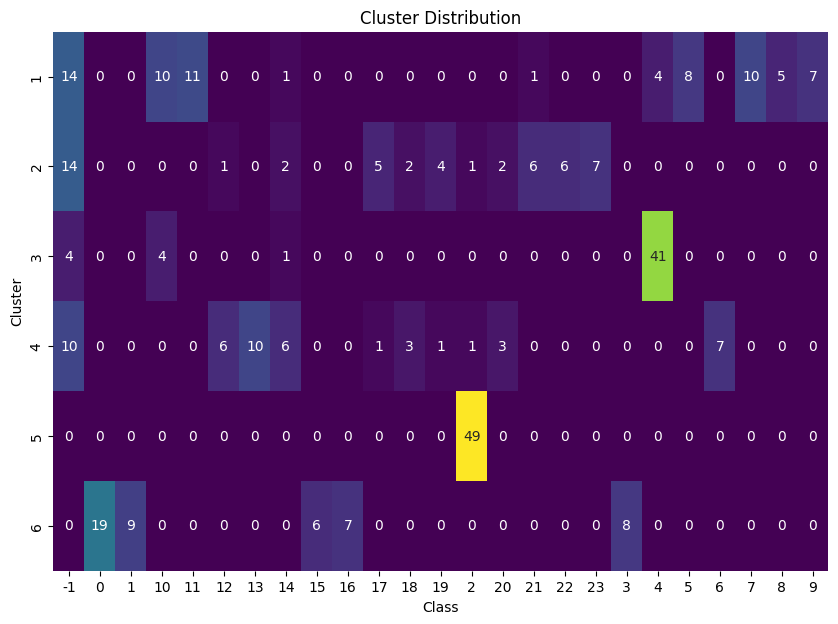

In [17]:
hdb = HDBSCAN()
hdb.fit(embedding)
yhat_bleu = hdb.labels_
# Evaluating the results: 
eval = evaluator_de_experiences(yhat_bleu, pixels_de_interet, dic_de_pixels, embedding)
eval.cluster_distribution()

# Bande NDVI

Axes(0.125,0.11;0.775x0.77)


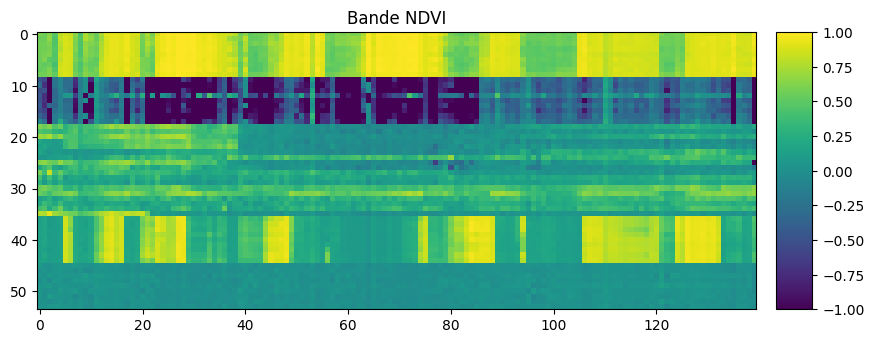

In [60]:
matrice = np.delete(matrice_ndvi,22,1)
# Displaying pixels
img = matrice
plt.figure(figsize=(10,10))
plt.title('Bande NDVI')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [61]:
reducer = umap.UMAP(random_state=42)
display(matrice.shape)
embedding = reducer.fit_transform(matrice)
display(embedding.shape)

(54, 140)

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(54, 2)

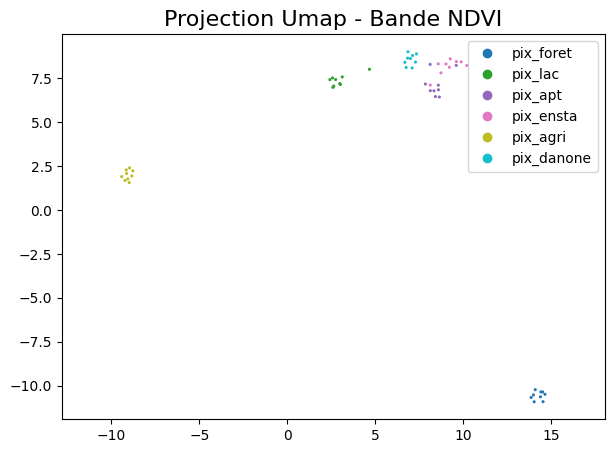

In [62]:
fig = plt.figure(figsize=(7, 5))
scat = plt.scatter(embedding[:, 0],
                   embedding[:, 1],
                   c=[x for x in classes],
                   cmap = 'tab10',
                   s=1.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(handles=scat.legend_elements()[0], labels=[key for key in dic_de_pixels.keys()])
plt.title('Projection Umap - Bande NDVI', fontsize=16)
plt.show()

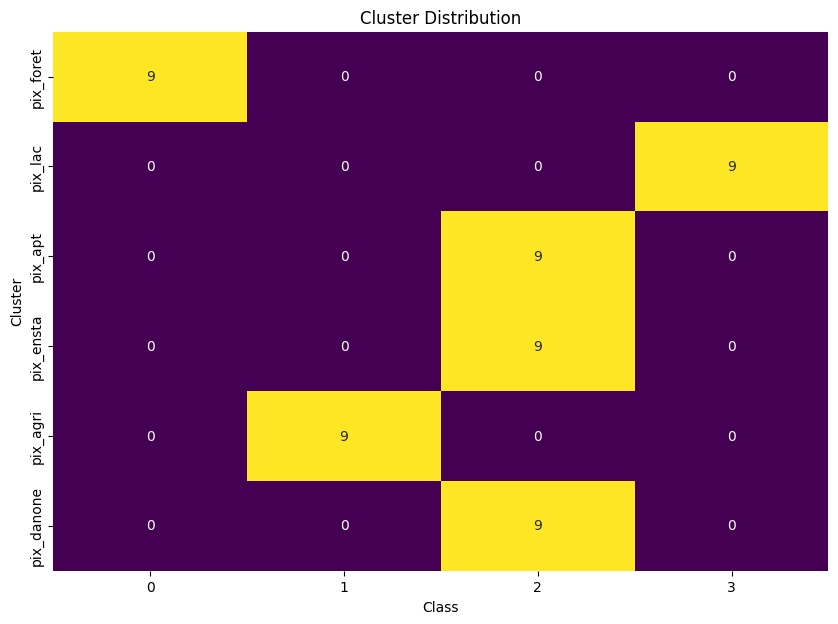

In [63]:
hdb = HDBSCAN()
hdb.fit(embedding)
yhat_ndvi = hdb.labels_
# Evaluating the results: 
eval = evaluator_de_experiences(yhat_ndvi, pixels_de_interet, dic_de_pixels, embedding)
eval.cluster_distribution()

# Bande NDWI

Axes(0.125,0.11;0.775x0.77)


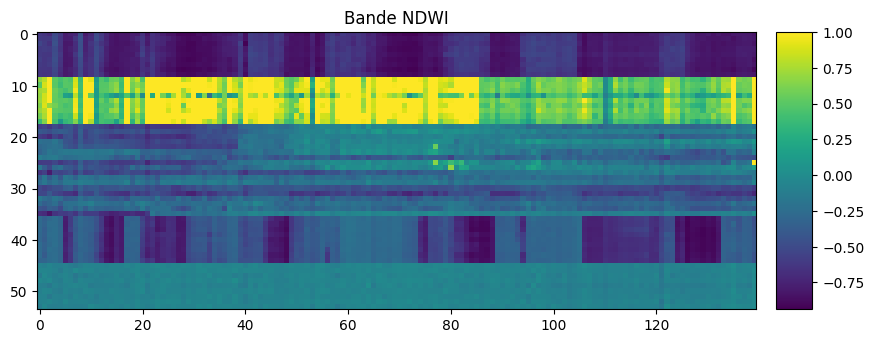

In [64]:
matrice = np.delete(matrice_ndwi,22,1)
# Displaying pixels
img = matrice
plt.figure(figsize=(10,10))
plt.title('Bande NDWI')
ax = plt.gca()
print(plt.gca())
im = ax.imshow(img)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)
plt.show()

In [65]:
reducer = umap.UMAP(random_state=42)
display(matrice.shape)
embedding = reducer.fit_transform(matrice)
display(embedding.shape)

(54, 140)

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(54, 2)

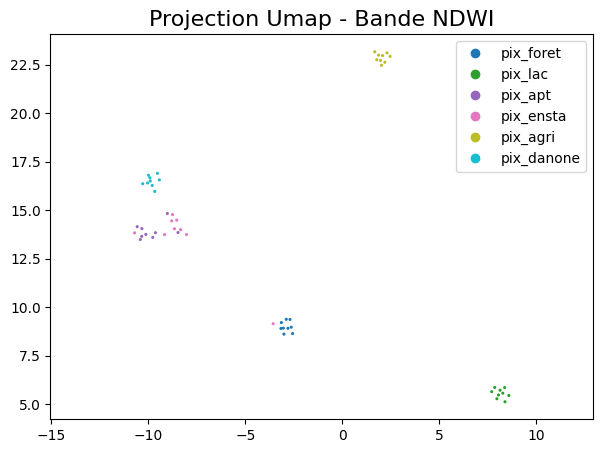

In [66]:
fig = plt.figure(figsize=(7, 5))
scat = plt.scatter(embedding[:, 0],
                   embedding[:, 1],
                   c=[x for x in classes],
                   cmap = 'tab10',
                   s=1.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(handles=scat.legend_elements()[0], labels=[key for key in dic_de_pixels.keys()])
plt.title('Projection Umap - Bande NDWI', fontsize=16)
plt.show()

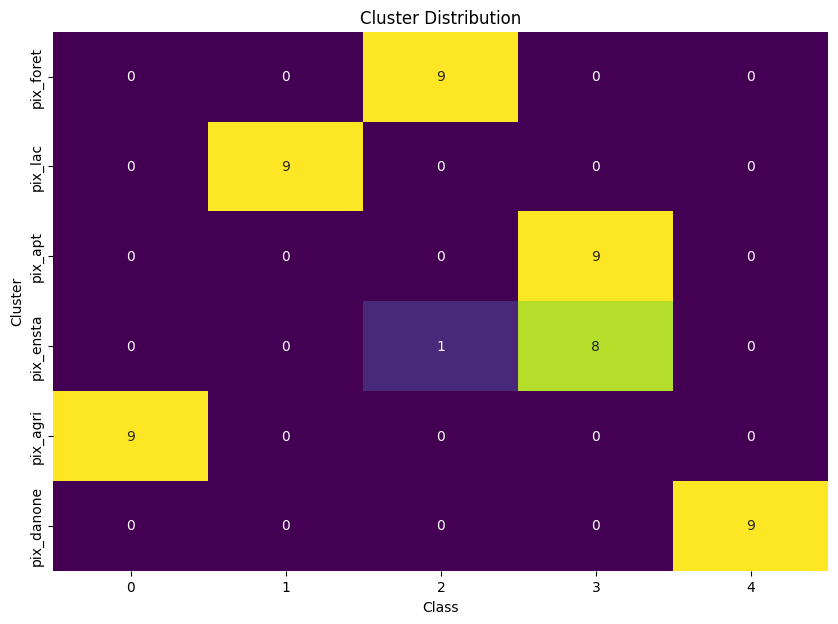

In [67]:
hdb = HDBSCAN()
hdb.fit(embedding)
yhat_ndwi = hdb.labels_
# Evaluating the results: 
eval = evaluator_de_experiences(yhat_ndwi, pixels_de_interet, dic_de_pixels, embedding)
eval.cluster_distribution()

# t-SNE

In [68]:
from openTSNE import TSNE

## Bande Rouge

In [69]:
tsne = TSNE(perplexity=30, metric="euclidean", n_jobs=8, random_state=42, verbose=True)
matrice = np.delete(matrice_rouge,22,1)
embedding = tsne.fit(matrice)

Perplexity value 30 is too high. Using perplexity 17.67 instead


--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 53 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.02 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.01 seconds
===> Running optimization with exaggeration=12.00, lr=4.50 for 250 iterations...
Iteration   50, KL divergence 0.9982, 50 iterations in 3.7931 sec
Iteration  100, KL divergence 0.9984, 50 iterations in 4.1702 sec
Iteration  150, KL divergence 0.9851, 50 iterations in 4.3063 sec
Iteration  200, KL divergence 0.9851, 50 iterations in 4.1992 sec
Iteration  250, KL divergence 0.9852, 50 iterations in 4.2322 sec
   --> Time elapsed: 20.70 seconds
===> Running optimization with exaggeration=1.00, lr=54.00 

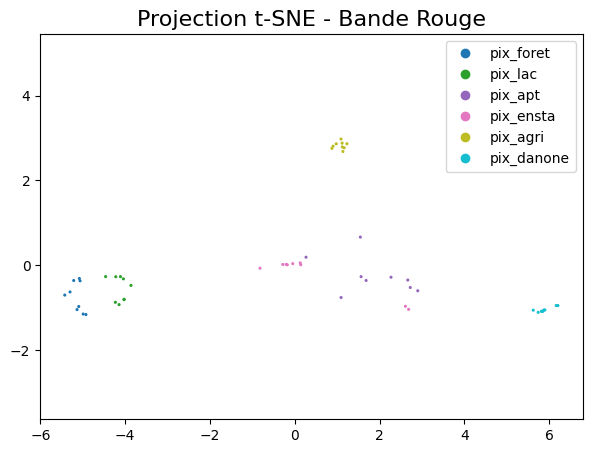

In [70]:
fig = plt.figure(figsize=(7, 5))
scat = plt.scatter(embedding[:, 0],
                   embedding[:, 1],
                   c=[x for x in classes],
                   cmap = 'tab10',
                   s=1.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(handles=scat.legend_elements()[0], labels=[key for key in dic_de_pixels.keys()])
plt.title('Projection t-SNE - Bande Rouge', fontsize=16)
plt.show()

## Bande Verte

In [71]:
tsne = TSNE(perplexity=30, metric="euclidean", n_jobs=8, random_state=42, verbose=True)
matrice = np.delete(matrice_vert,22,1)
embedding = tsne.fit(matrice)

Perplexity value 30 is too high. Using perplexity 17.67 instead


--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 53 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.01 seconds
===> Running optimization with exaggeration=12.00, lr=4.50 for 250 iterations...
Iteration   50, KL divergence -1.0589, 50 iterations in 2.5166 sec
Iteration  100, KL divergence 0.9922, 50 iterations in 0.6163 sec
Iteration  150, KL divergence 0.9922, 50 iterations in 0.1291 sec
Iteration  200, KL divergence 0.9922, 50 iterations in 0.1289 sec
Iteration  250, KL divergence 0.9922, 50 iterations in 0.1250 sec
   --> Time elapsed: 3.52 seconds
===> Running optimization with exaggeration=1.00, lr=54.00 

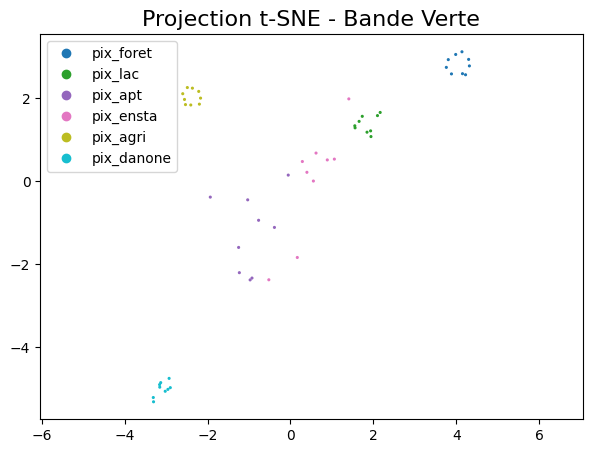

In [72]:
fig = plt.figure(figsize=(7, 5))
scat = plt.scatter(embedding[:, 0],
                   embedding[:, 1],
                   c=[x for x in classes],
                   cmap = 'tab10',
                   s=1.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(handles=scat.legend_elements()[0], labels=[key for key in dic_de_pixels.keys()])
plt.title('Projection t-SNE - Bande Verte', fontsize=16)
plt.show()

## Bande Bleue

In [73]:
tsne = TSNE(perplexity=30, metric="euclidean", n_jobs=8, random_state=42, verbose=True)
matrice = np.delete(matrice_bleu,22,1)
embedding = tsne.fit(matrice)

Perplexity value 30 is too high. Using perplexity 17.67 instead


--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 53 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.01 seconds
===> Running optimization with exaggeration=12.00, lr=4.50 for 250 iterations...
Iteration   50, KL divergence -0.5575, 50 iterations in 2.8125 sec
Iteration  100, KL divergence -0.2100, 50 iterations in 1.9454 sec
Iteration  150, KL divergence 1.0087, 50 iterations in 0.5749 sec
Iteration  200, KL divergence 1.0087, 50 iterations in 0.1379 sec
Iteration  250, KL divergence 1.0087, 50 iterations in 0.1433 sec
   --> Time elapsed: 5.61 seconds
===> Running optimization with exaggeration=1.00, lr=54.00

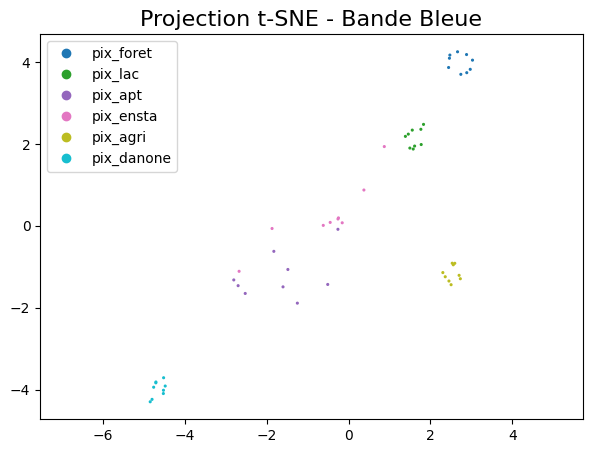

In [74]:
fig = plt.figure(figsize=(7, 5))
scat = plt.scatter(embedding[:, 0],
                   embedding[:, 1],
                   c=[x for x in classes],
                   cmap = 'tab10',
                   s=1.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(handles=scat.legend_elements()[0], labels=[key for key in dic_de_pixels.keys()])
plt.title('Projection t-SNE - Bande Bleue', fontsize=16)
plt.show()

## Bande NIR

In [75]:
tsne = TSNE(perplexity=30, metric="euclidean", n_jobs=8, random_state=42, verbose=True)
matrice = np.delete(matrice_nir,22,1)
embedding = tsne.fit(matrice)

Perplexity value 30 is too high. Using perplexity 17.67 instead


--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 53 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.02 seconds
===> Running optimization with exaggeration=12.00, lr=4.50 for 250 iterations...
Iteration   50, KL divergence 0.8923, 50 iterations in 3.4196 sec
Iteration  100, KL divergence 0.7087, 50 iterations in 3.1284 sec
Iteration  150, KL divergence 0.8748, 50 iterations in 3.0526 sec
Iteration  200, KL divergence 0.9350, 50 iterations in 3.1277 sec
Iteration  250, KL divergence 0.9462, 50 iterations in 3.0731 sec
   --> Time elapsed: 15.80 seconds
===> Running optimization with exaggeration=1.00, lr=54.00 

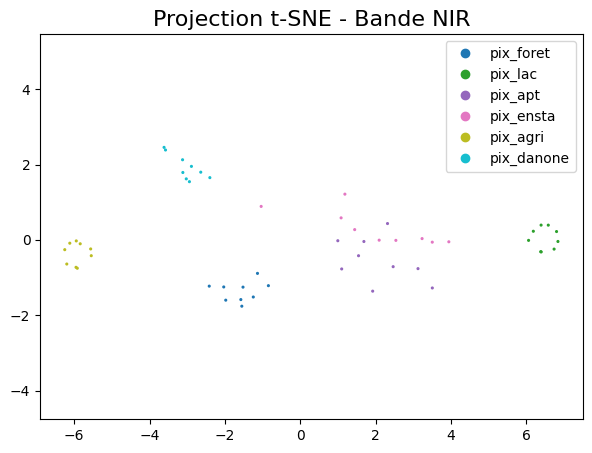

In [76]:
fig = plt.figure(figsize=(7, 5))
scat = plt.scatter(embedding[:, 0],
                   embedding[:, 1],
                   c=[x for x in classes],
                   cmap = 'tab10',
                   s=1.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(handles=scat.legend_elements()[0], labels=[key for key in dic_de_pixels.keys()])
plt.title('Projection t-SNE - Bande NIR', fontsize=16)
plt.show()

## Bande NDVI

In [77]:
tsne = TSNE(perplexity=30, metric="euclidean", n_jobs=8, random_state=42, verbose=True)
matrice = np.delete(matrice_ndvi,22,1)
embedding = tsne.fit(matrice)

Perplexity value 30 is too high. Using perplexity 17.67 instead


--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 53 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=4.50 for 250 iterations...
Iteration   50, KL divergence 1.0293, 50 iterations in 3.8944 sec
Iteration  100, KL divergence 0.9935, 50 iterations in 3.9999 sec
Iteration  150, KL divergence 0.9966, 50 iterations in 4.1555 sec
Iteration  200, KL divergence 0.9963, 50 iterations in 4.1586 sec
Iteration  250, KL divergence 0.9964, 50 iterations in 4.1598 sec
   --> Time elapsed: 20.37 seconds
===> Running optimization with exaggeration=1.00, lr=54.00 

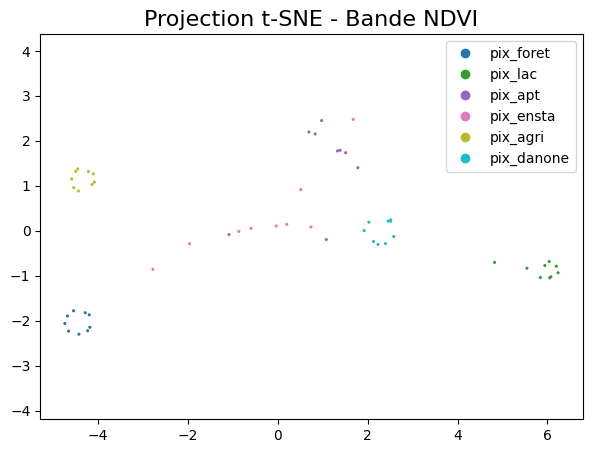

In [78]:
fig = plt.figure(figsize=(7, 5))
scat = plt.scatter(embedding[:, 0],
                   embedding[:, 1],
                   c=[x for x in classes],
                   cmap = 'tab10',
                   s=1.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(handles=scat.legend_elements()[0], labels=[key for key in dic_de_pixels.keys()])
plt.title('Projection t-SNE - Bande NDVI', fontsize=16)
plt.show()

## Bande NDWI

In [79]:
tsne = TSNE(perplexity=30, metric="euclidean", n_jobs=8, random_state=42, verbose=True)
matrice = np.delete(matrice_ndwi,22,1)
embedding = tsne.fit(matrice)

Perplexity value 30 is too high. Using perplexity 17.67 instead


--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 53 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.01 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.02 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.10 seconds
===> Running optimization with exaggeration=12.00, lr=4.50 for 250 iterations...
Iteration   50, KL divergence 0.9210, 50 iterations in 3.7438 sec
Iteration  100, KL divergence 0.9356, 50 iterations in 4.1270 sec
Iteration  150, KL divergence 0.9366, 50 iterations in 4.1722 sec
Iteration  200, KL divergence 0.9334, 50 iterations in 4.2001 sec
Iteration  250, KL divergence 0.9363, 50 iterations in 4.2879 sec
   --> Time elapsed: 20.53 seconds
===> Running optimization with exaggeration=1.00, lr=54.00 

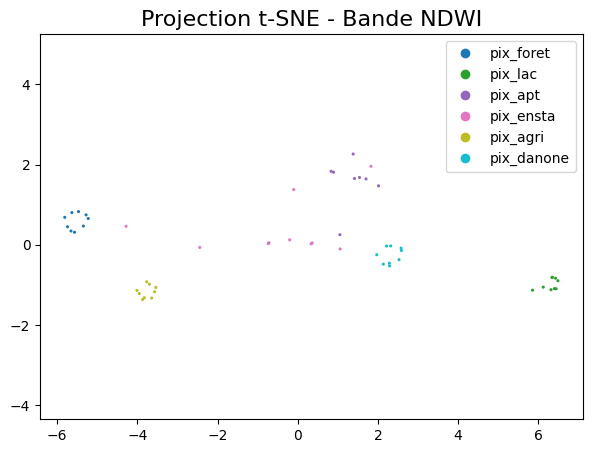

In [80]:
fig = plt.figure(figsize=(7, 5))
scat = plt.scatter(embedding[:, 0],
                   embedding[:, 1],
                   c=[x for x in classes],
                   cmap = 'tab10',
                   s=1.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(handles=scat.legend_elements()[0], labels=[key for key in dic_de_pixels.keys()])
plt.title('Projection t-SNE - Bande NDWI', fontsize=16)
plt.show()

# Prototype pour le systéme de combination de clusterings

In [18]:
display(yhat_rouge)
display(yhat_vert)
display(len(yhat_bleu))

array([ 8, -1,  8,  9,  9, -1, 11, -1,  9,  8, 11,  9, -1, -1,  9,  8,  6,
       10, -1,  6, 10,  9,  6,  8, 10, 10, 10, -1, 12,  8,  8, 11,  8, -1,
       13, -1, 11, -1, 10, 11, 11,  8, 10,  9,  9,  8, 11,  9,  9, 10, 10,
        9, 12, 10, 13,  9,  9,  9,  9, -1,  6, -1, 12, -1, 10, -1, -1, -1,
        6,  9, 11, 14,  7, -1,  7, 14,  7,  7,  7,  7, 12,  7,  7,  7,  0,
       -1, 13, 13,  7, 13,  7, 14, 14, 14,  7, 14,  7,  7,  7, 13, 13, -1,
       14, 14,  7,  7,  7,  7,  7,  7,  7, 13,  7,  7,  7,  5,  7,  7,  7,
        7,  7,  6, -1,  6,  6,  6,  6,  6,  6,  6,  6, -1,  6,  6,  6, 13,
        6,  6, -1,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6, -1,  6,  6,  6,  6,  6,  6,  6,  7,  6,
        6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12,  4,  4,  4,  4,  4,  4,  4,  7,  7, 14,
       13,  7, 13,  7, 13,  7, 14, 13, 13, 13, 13,  0, 13,  7, 13,  0,  0,
        0,  0,  0,  0,  0

array([11, 13, 11, 12, 12, 13,  9, -1, -1, 11,  9, -1, 13, -1, -1, -1, 19,
       10, -1, 19, 10, -1, 19, 11, 10, 10, -1, -1, 13, 11, 11,  9, 11, -1,
       15, 12,  9, -1, 10,  9,  9, 11, 10, 12, 12, 11,  9, 12, 12, 10, 10,
       12, 13, -1, -1, 12, 12, -1, 12, 13, 19, 13, 13, 12, 12, -1, -1, 12,
       19, 12,  9, 13,  6,  5,  6, 13,  6,  6, -1,  6, 16,  6,  6,  6,  2,
        2, 14, 15,  5, -1,  6, 13,  5, 13, 15, 14,  6,  6,  6, -1, -1, -1,
       13, 13,  6,  5,  2,  6,  6,  6,  6, -1,  6,  6,  6,  2,  6,  6,  2,
        5,  6, 19, -1, 18, 18, 18, -1, 19, -1, 18, 12, 12, 19, 19, -1, 19,
       19, 19, 15, -1, 18, 19, 19, 18, 18, 19, 18, 18, 19, -1, 19, 19, 18,
       19, -1, 19, -1, -1, 18, 18, 12, 18, 19, 19, 19, 19, -1, 19, 15, 19,
       19, 17, 17, 16, 16, 17, 17, 16, 16, -1, 16, 14, 14, -1, -1, 16, 17,
       17, 16, 16, 17, 16, 16, -1,  3,  3,  3,  3,  3,  3,  3,  5,  6, 13,
       14, -1, -1,  6, 14, 15, -1, 15, 14, 15, 15,  2, 15,  6, 15,  2,  2,
        2,  2,  2,  2,  2

317

# DRAFT : Systeme de combination de clusterings

In [19]:
'''
def de matrice : 
[
 [[x1,x2], .......... ]
 [                    ]    
 [                    ]

]
'''
n_clusters = 3
matrice  = [[[] for _ in range(len(set(yhat_rouge)))] for _ in range(len(set(yhat_vert))+len(set(yhat_bleu)))]
for i in range(len(yhat_rouge)):
    matrice[yhat_vert[i]][yhat_rouge[i]].append(i)
    matrice[len(set(yhat_vert))+yhat_bleu[i]][yhat_rouge[i]].append(i)
# display(matrice)
# ----------------- Matrice de confusion --------------------------------
conf = [[len(matrice[j][i]) for i in range(len(set(yhat_rouge)))] for j in range(len(set(yhat_vert))+len(set(yhat_bleu)))]
conf = np.array(conf).astype(dtype=np.float16)
display(conf)
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        conf[i,j]=conf[i, j]/(max(conf[i,:].sum(), (conf[:,j].sum()/(n_clusters-1))))

display(conf)

array([[ 0.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0., 19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [51.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 26.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0

array([[0.     , 1.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     ],
       [0.     , 0.     , 1.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     ],
       [0.9272 , 0.     , 0.     , 0.     , 0.     , 0.0714 , 0.     ,
        0.05405, 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.0435 ],
       [0.     , 0.     , 0.     , 0.     , 1.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     ],
       [0.     , 0.     , 0.     , 1.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.111  , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.1  

In [20]:
#Construction du vecteur clusters

vect_cluster=[0]*(len(set(yhat_bleu))+len(set(yhat_vert)))
# vect_cluster=[0]*10 # à commenter, décommenter ligne au dessus
for i in range(conf.shape[0]):
    vect_cluster[i]=np.argmax(conf[i,:])

print(vect_cluster)


[1, 2, 0, 4, 3, 7, 7, 5, 5, 11, 10, 8, 9, 14, 13, 13, 12, 12, 6, 6, 15, 2, 1, 0, 3, 6, 11, 4, 10, 12, 9, 9, 8, 12, 12, 13, 5, 5, 14, 14, 7, 7, 7, 7, 7, 15]


In [21]:
#to relabel clustering results
yhat_vert_relabeled=yhat_vert
yhat_bleu_relabeled=yhat_bleu

for k in range(0,len(set(yhat_vert))):
    yhat_vert_relabeled=np.where(yhat_vert==k,vect_cluster[k],yhat_vert_relabeled)
for k in range(0,len(set(yhat_bleu))):
    yhat_bleu_relabeled=np.where(yhat_bleu==k,vect_cluster[k+len(set(yhat_vert))],yhat_bleu_relabeled)
print(yhat_vert_relabeled)
print(yhat_bleu_relabeled)

[ 8 14  8  9  9 14 11 -1 -1  8 11 -1 14 -1 -1 -1  6 10 -1  6 10 -1  6  8
 10 10 -1 -1 14  8  8 11  8 -1 13  9 11 -1 10 11 11  8 10  9  9  8 11  9
  9 10 10  9 14 -1 -1  9  9 -1  9 14  6 14 14  9  9 -1 -1  9  6  9 11 14
  7  7  7 14  7  7 -1  7 12  7  7  7  0  0 13 13  7 -1  7 14  7 14 13 13
  7  7  7 -1 -1 -1 14 14  7  7  0  7  7  7  7 -1  7  7  7  0  7  7  0  7
  7  6 -1  6  6  6 -1  6 -1  6  9  9  6  6 -1  6  6  6 13 -1  6  6  6  6
  6  6  6  6  6 -1  6  6  6  6 -1  6 -1 -1  6  6  9  6  6  6  6  6 -1  6
 13  6  6 12 12 12 12 12 12 12 12 -1 12 13 13 -1 -1 12 12 12 12 12 12 12
 12 -1  4  4  4  4  4  4  4  7  7 14 13 -1 -1  7 13 13 -1 13 13 13 13  0
 13  7 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  3  3  3  3  3  3  3  3  1  1  1  1  1  1  1  1  1  5  5  5
  5  5  5  5  5  5  5  5  5  5  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2]
[ 8 12  8  9  9 -1 11 -1 -1  8 11 

In [22]:
# Matrice de clusterings "relabeled"
results=np.column_stack((yhat_rouge,yhat_vert_relabeled,yhat_bleu_relabeled))
# results=np.column_stack((yhat_rouge,yhat_vert_relabeled,yhat_vert_relabeled)) # à commenter, décommenter ligne au dessus 
print(results)

[[ 8  8  8]
 [-1 14 12]
 [ 8  8  8]
 [ 9  9  9]
 [ 9  9  9]
 [-1 14 -1]
 [11 11 11]
 [-1 -1 -1]
 [ 9 -1 -1]
 [ 8  8  8]
 [11 11 11]
 [ 9 -1  9]
 [-1 14  9]
 [-1 -1  8]
 [ 9 -1  9]
 [ 8 -1  9]
 [ 6  6  6]
 [10 10 10]
 [-1 -1  9]
 [ 6  6  6]
 [10 10 10]
 [ 9 -1  9]
 [ 6  6 -1]
 [ 8  8  8]
 [10 10 10]
 [10 10 10]
 [10 -1 10]
 [-1 -1 -1]
 [12 14 12]
 [ 8  8  8]
 [ 8  8  8]
 [11 11 11]
 [ 8  8  8]
 [-1 -1  8]
 [13 13  7]
 [-1  9 -1]
 [11 11 11]
 [-1 -1 -1]
 [10 10 10]
 [11 11 11]
 [11 11 11]
 [ 8  8  8]
 [10 10 10]
 [ 9  9  9]
 [ 9  9 -1]
 [ 8  8  8]
 [11 11 11]
 [ 9  9  9]
 [ 9  9  9]
 [10 10 10]
 [10 10 10]
 [ 9  9  9]
 [12 14 12]
 [10 -1 -1]
 [13 -1 -1]
 [ 9  9  9]
 [ 9  9  9]
 [ 9 -1  9]
 [ 9  9  9]
 [-1 14 -1]
 [ 6  6  6]
 [-1 14 12]
 [12 14 12]
 [-1  9 -1]
 [10  9 10]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1  9 13]
 [ 6  6  6]
 [ 9  9  9]
 [11 11 11]
 [14 14 14]
 [ 7  7  7]
 [-1  7  7]
 [ 7  7  7]
 [14 14 14]
 [ 7  7  7]
 [ 7  7  7]
 [ 7 -1 -1]
 [ 7  7  7]
 [12 12 12]
 [ 7  7 -1]
 [ 7  7 -1]
 [ 7

In [23]:
#Vote et génération des clusters finaux

import random as rd
clusters=[]
for i in range(len(yhat_rouge)):
    values, counts = np.unique(results[i,:], return_counts=True)
    if np.all(counts==1):
        clusters.append(rd.randint(0,n_clusters))
    else:
        clusters.append(values[counts.argmax()])

In [24]:
# on vérifie que tout va bien
print(clusters)
print(len(clusters))
print(np.unique(clusters))
evaluator = evaluator_de_experiences(np.array(clusters), pixels_de_interet, dic_de_pixels, matrice)


[8, 1, 8, 9, 9, -1, 11, -1, -1, 8, 11, 9, 0, -1, 9, 2, 6, 10, -1, 6, 10, 9, 6, 8, 10, 10, 10, -1, 12, 8, 8, 11, 8, -1, 13, -1, 11, -1, 10, 11, 11, 8, 10, 9, 9, 8, 11, 9, 9, 10, 10, 9, 12, -1, -1, 9, 9, 9, 9, -1, 6, 2, 12, -1, 10, -1, -1, 3, 6, 9, 11, 14, 7, 7, 7, 14, 7, 7, -1, 7, 12, 7, 7, 7, 0, 1, 13, 13, 7, -1, 7, 14, 0, 14, 1, 14, 7, 7, 7, -1, -1, -1, 14, 14, 7, 7, 7, 7, 7, 7, 7, 13, 7, 7, 7, 3, 7, 7, 7, 7, 7, 6, -1, 6, 6, 6, 6, 6, 6, 6, 9, 9, 6, 6, -1, 13, 6, 6, -1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 9, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 12, 12, 12, 12, 12, 12, 12, 12, -1, 12, 13, 1, 12, -1, 12, 12, 12, 12, 12, 12, 12, 12, -1, 4, 4, 4, 4, 4, 4, 4, 7, 7, 14, 13, -1, -1, 7, 13, 7, -1, 13, 13, 13, 13, 0, 13, 7, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2,

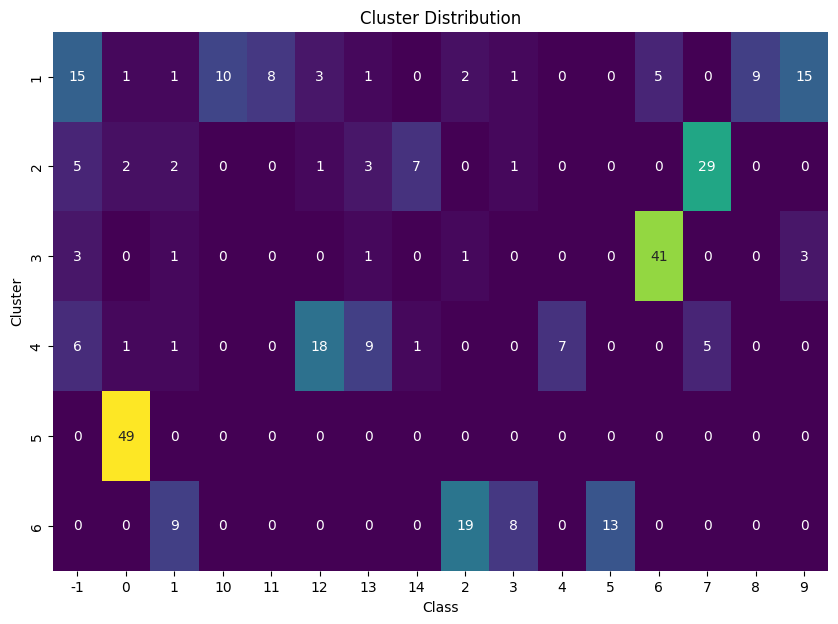

In [25]:
evaluator.cluster_distribution()